# 线性回归

## 线性回归预测公式:

$\hat{y}(w,x) = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

这里 $x_i$ 代表输入向量的第i维，$w_i$ 则是参数的第i维，$\hat{y}$是输出值。

In [ ]:
### 线性回归
## 预测函数
## y = w0 + w1*x
## x:输入 y:输出 w0和w1:模型参数
## 所谓模型训练,就是根据已知的x和y,找到最佳的模型参数w0和w1
## 5.0 = w0 + w1 * 0.5
## 5.5 = w0 + w1 * 0.6
## 单样本误差:
## 根据预测函数求出输入x时的预测值:y_pred = w0 + w1*x,单样本误差为1/2*(y_pred_y)^2
## 总样本误差:
## 把所有单样本误差的和即是: 1/2*sum(y_pred - y)^2
## 将y_pred的计算公式代入,即可求得损失函数:
## loss = 1/2 * sum(w0 + w1*x - y)^2
## 即需要找到一组w0, w1,使得loss取极小值

In [ ]:
import sklearn.linear_model as lr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1234)
# X = np.random.randint(1,10, size=(5,2))
X = np.random.randint(1, 10, size=(500, 2))
## y = 2*x_0 + 3*x_1 + 4
y = np.dot(X, np.array([2, 3])) + 4
print('X', X)
print('y', y)
reg = lr.LinearRegression()
reg.fit(X, y)
print('线性模型系数是:', reg.coef_)
print('线性模型偏置是:', reg.intercept_)
pred = reg.predict(np.array([[4, 5]]))
print("线性模型预测值:", pred)
print("线性模型评分值:", reg.score(X, y))

### 从这里可以看出只要给X和预测值Y,就可以进行线性拟合,得到系数,然后就可以预测

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.scatter(X[:,0], X[:,1], y)
axes.set_xlabel(r'$X_0$')
axes.set_ylabel(r'$X_1$')
axes.set_zlabel("y")
plt.show()

In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
model = linear_model.LinearRegression()
## Y = w0 + w1*x1 + w2*x2 + ... + wn*xn
## y = kx + b
X = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
])
Y = np.array([0, 1, 2])
model.fit(X, Y)
## model.intercept_ w0
## model.coef_ (w1, w2, ...)
print(model.coef_, model.intercept_)

[0.5 0.5] 1.1102230246251565e-16


4.114114114114114 2.2122122122122114


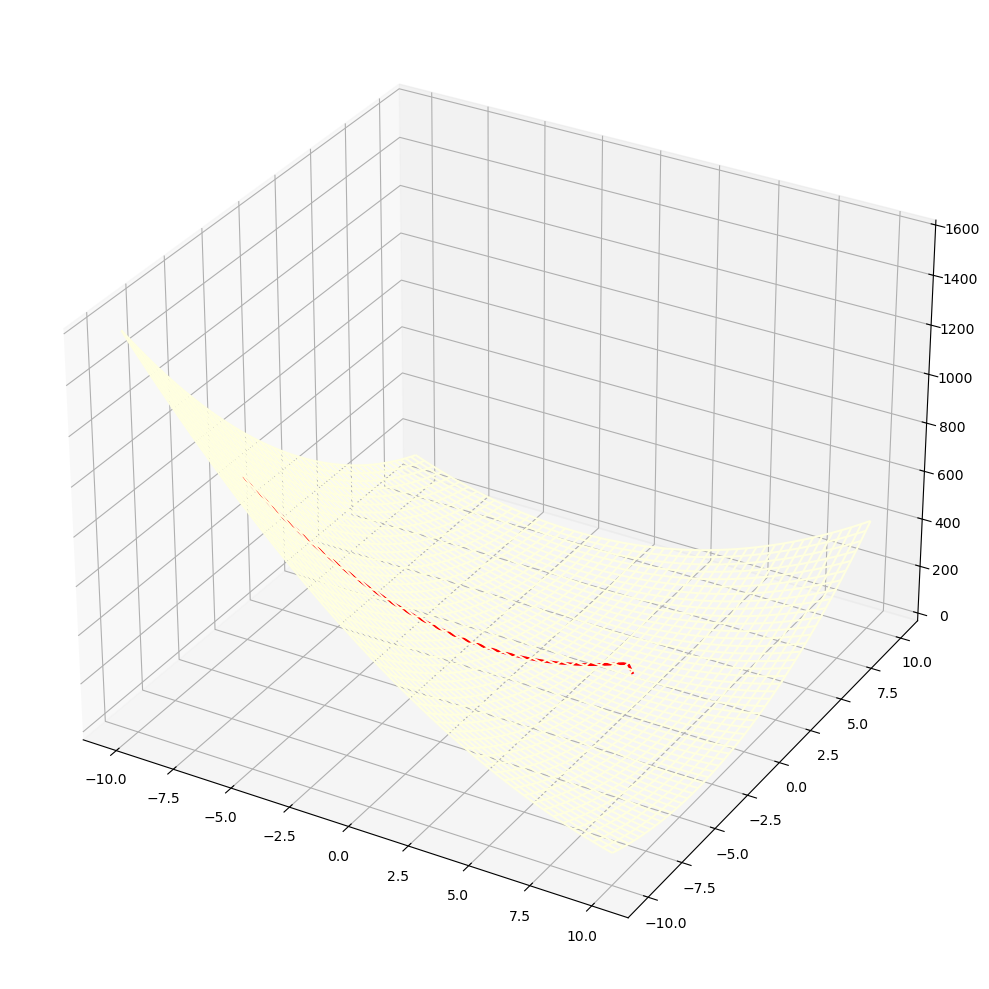

In [11]:
## 绘制损失函数
import matplotlib.pyplot as plt
import numpy as np

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

n = 1000
## 说一下meshgrid的作用,其实就是将x,y的坐标生成网格矩阵
## 也就是: x会沿着y轴方向复制len(y)个, y会沿着x轴方向复制len(x)个
## 所以x,y的每个坐标点组合起来就是整个网格的坐标(x,y)
w0, w1 = np.meshgrid(np.linspace(-10, 10, n), np.linspace(-10, 10, n))

loss = np.zeros_like(w0)
## 这里要理解,自变量是w0和w1, x,y是已知点
## 损失函数,是求在已知点x,y(PS:x,y是一组点),求随机点(w0, w1)参数的损失和
## 所以当w0,w1在整个坐标系范围遍历时,即可以求出在这片矩阵区域内,损失函数的形状!!!
for x, y in zip(xs, ys):
    loss += (w0 + w1 * x - y)**2 / 2

## 这里即可获得最好的参数(w0, w1), 可以和后面的值做对比, 斜率方向要一致才行
best_w0 = w0[0][int(loss.argmin() % n)]
best_w1 = w1[int(loss.argmin() / n)][0]
print(best_w0, best_w1)

w0_arr = [-7]
w1_arr = [-7]
loss_arr = [((w0_arr[-1] + w1_arr[-1] * xs - ys)**2).sum() /2]
times = 1000
lr = 0.01 ## 可以修改成0.1 0.5等测试情况,会发现大不同,梯度爆炸...所以要合理设置学习率
for i in range(times):
    w0_ = w0_arr[-1] - lr * (w0_arr[-1] + w1_arr[-1] * xs - ys).sum()
    w1_ = w1_arr[-1] - lr * (xs * (w0_arr[-1] + w1_arr[-1] * xs - ys)).sum()
    w0_arr.append(w0_)
    w1_arr.append(w1_)
    loss_ = ((w0_ + w1_ * xs - ys)**2).sum() /2
    loss_arr.append(loss_)
    # print(f"w0={w0_}, w1={w1_}, loss={loss_}")


fig = plt.figure(figsize=(10, 10))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_wireframe(w0, w1, loss, color='lightyellow', rstride=20, cstride=20)
ax3d.plot(w0_arr, w1_arr, loss_arr, c='r', linewidth=2)
axes.set_zlabel('loss')
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)
axes.set_xlabel('w0')
axes.set_ylabel('w1')
axes.set_zlabel('loss')
plt.tight_layout()
plt.show()



In [ ]:

fig = plt.figure(figsize=(10, 10))
ax_w0 = fig.add_subplot(411)
ax_w0.plot(w0_arr, loss_arr, c='g', linewidth=2)
ax_w0.set_xlabel('w0')
ax_w0.set_ylabel('loss')

ax_w1 = fig.add_subplot(412)
ax_w1.plot(w1_arr, c='g', linewidth=2)
ax_w1.set_xlabel('epoch')
ax_w1.set_ylabel('w1')

ax_w1 = fig.add_subplot(413)
ax_w1.plot(loss_arr, c='g', linewidth=2)
ax_w1.set_xlabel('epoch')
ax_w1.set_ylabel('loss')

ax_contour = fig.add_subplot(414)
##画等高线
cntr = ax_contour.contour(w0, w1, loss)
##填充等高线
ax_contour.contourf(w0, w1, loss, 20)
##设置等高线的文本
ax_contour.clabel(cntr,
           inline=True, ##是否在线内
           inline_spacing=5, #与线的距离
           fontsize=10,
           colors='black',
           fmt='%1.1f', ##文本格式
           )

## 画线
ax_contour.plot(w0_arr, w1_arr, color='red')
ax_contour.set_xlabel('w0')
ax_contour.set_ylabel('w1')
ax_contour.set_xlim(-10, 10)
ax_contour.set_ylim(-10, 10)

plt.tight_layout()
plt.show()

4.065692318299849 2.2634176028710415
best w0,w1: 4.1056169703701855 2.2207723503249293


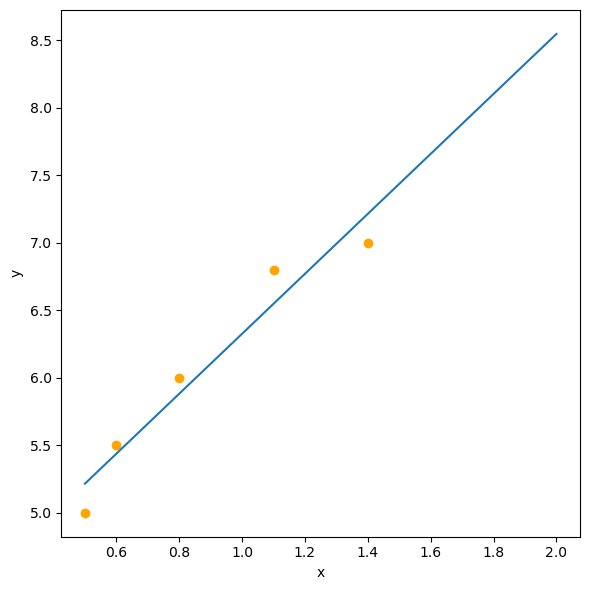

In [14]:
## 绘制拟合线

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
## 现在需要知道最合适的w0,w1,即可求得拟合线
## yy = best_w0 + best_w1 * xx
## 梯度下降法求回归曲线
## 损失函数,求偏导
## dw0 --> w0移动方向
## dw1 --> w1移动方向
## w0 = w0 - lr * dw0
## w1 = w1 - lr * dw1
best_w0, best_w1 = 1, 1
lr = 0.01
times = 2000
for i in range(times):
    best_w0 = best_w0 - lr * (best_w0 + best_w1 * xs - ys).sum()
    best_w1 = best_w1 - lr * (xs * (best_w0 + best_w1 * xs - ys)).sum()

w0_arr = [1]
w1_arr = [1]
times = 1000
for i in range(times):
    w0_ = w0_arr[-1] - lr * (w0_arr[-1] + w1_arr[-1] * xs - ys).sum()
    w1_ = w1_arr[-1] - lr * (xs * (w0_arr[-1] + w1_arr[-1] * xs - ys)).sum()
    w0_arr.append(w0_)
    w1_arr.append(w1_)
print(w0_arr[-1], w1_arr[-1])

print('best w0,w1:', best_w0, best_w1)
xx = np.linspace(0.5, 2, 100)
yy = best_w0 + best_w1 * xx

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c='orange')
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

[[2.2189781]] [4.10729927]
均方误差: 0.034744525547445136
均值绝对值误差: 0.17226277372262738
中值绝对值误差: 0.21386861313868621
R2得分 (0. 1]区间, 分数越高,误差越小.): 0.9395116198686541


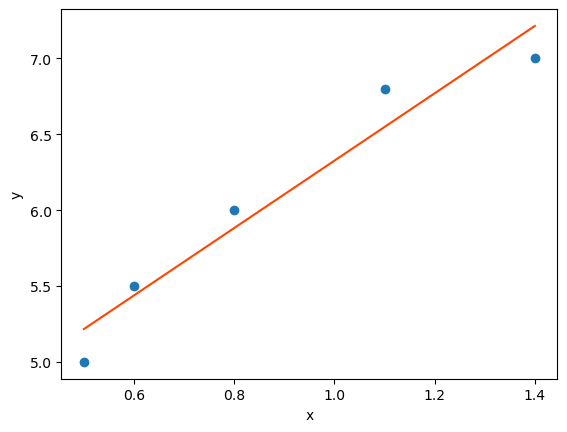

In [15]:
## 线性回归 误差计算
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4]).reshape(-1, 1)
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0]).reshape(-1, 1)

model = LinearRegression()
model.fit(xs, ys)

print(model.coef_, model.intercept_)
y_pred = model.predict(xs)

print("均方误差:", sm.mean_squared_error(ys, y_pred))
print("均值绝对值误差:", sm.mean_absolute_error(ys, y_pred))
print("中值绝对值误差:", sm.median_absolute_error(ys, y_pred))
print("R2得分 (0. 1]区间, 分数越高,误差越小.):", sm.r2_score(ys, y_pred))


plt.figure()
plt.scatter(xs, ys, label="data")
plt.plot(xs, model.predict(xs), c='orangered', label="prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
### 模型的保存
import pickle

with open("ml_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [17]:
### 模型读取
with open("ml_model.pkl", "rb") as f:
    model = pickle.load(f)
    print(model.coef_, model.intercept_)
    print(model.predict(xs))

[[2.2189781]] [4.10729927]
[[5.21678832]
 [5.43868613]
 [5.88248175]
 [6.54817518]
 [7.21386861]]
